In [44]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings

In [42]:
warnings.filterwarnings('ignore')

In [47]:
# dir(sklearn.linear_model)

<h2>1. Preprocessing</h2>

### 1.1 Read the Iris dataset

In [12]:
iris = pd.read_csv('iris.csv')
iris.columns = [col.replace(' ', '_') for col in iris.columns]
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [15]:
iris.rename(columns={'class':'species'}, inplace=True)
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### 1.2 Label encode the target variable

In [19]:
encoder = LabelEncoder()
iris["species"] = encoder.fit_transform(iris.species)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. EDA

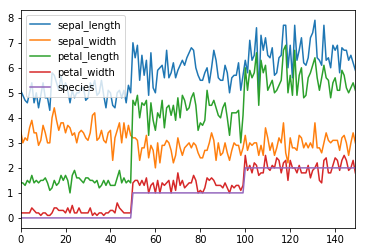

In [51]:
iris.plot()

Split the data

In [25]:
train, test = train_test_split(iris, test_size=0.2, random_state=0)

In [26]:
train.shape

(120, 5)

In [27]:
train_x = train.drop(columns=['species'],axis=1)
train_y = train['species']

test_x = test.drop(columns=['species'],axis=1)
test_y = test['species']

Train the model

In [43]:
model = LogisticRegression()

model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
predict = model.predict(test_x)

In [52]:
gcf = plt.figure(1)

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'species')

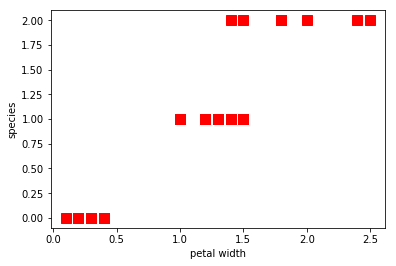

In [53]:
plt.plot(test_x.petal_width, predict, 'rs', markersize=10)
plt.xlabel('petal width')
plt.ylabel('species')

In [37]:
accuracy_score(test_y,predict)

0.9666666666666667